<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [ ]:
#URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm

In [3]:
r = requests.get(URL)
soup = BeautifulSoup(r.text, 'html.parser')

NameError: name 'URL' is not defined

In [4]:
print(soup.prettify()[:1000])

NameError: name 'soup' is not defined

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [5]:
def extract_location_from_result(result):
    return result.find('span', attrs={'class':'location'}).text.replace('\n','').strip()

In [6]:
def extract_company_from_result(result):
    return result.find('span', attrs={'class':'company'}).text.replace('\n','').strip()

In [7]:
def extract_job_from_result(result):
    return result.find('a', attrs={'target':'_blank'}).text.replace('\n','').strip()

In [8]:
def extract_salary_from_result(result):
    return result.find('span', attrs={'class':'salaryText'}).text.replace('\n','').strip()

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [9]:
YOUR_CITY = 'London'

In [10]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
max_results_per_city = 100 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = []

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', YOUR_CITY]):
    for start in range(0, max_results_per_city, 10):
        # Grab the results from the request (as above)
        # Append to the full set of results
        pass

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [12]:
job = []
company = []
location = []
salary = []
description = []
rating = []

max_results_per_city = 100
for jobs in set(['data+analyst', 'data+scientist', 'junior+data+scientist', 'junior+data+analyst']):
    for city in set(['Bristol', 'Birmingham', 'Oxford', 'Cambridge', 'Newcastle', 
        'Manchester', 'Leeds', 'Nottingham', 'Edinburgh', 'Glasgow']):
        for x in tqdm(range(0,max_results_per_city,10)):
            URL = f"http://www.indeed.co.uk/jobs?q={jobs}&l={city}&start={x}"
            r = requests.get(URL)
            soup = BeautifulSoup(r.text, 'html.parser')

            for listing in soup.find_all('div', attrs={'class':'result'}):
                try:
                    job.append(listing.find('a', attrs={'target':'_blank'}).text.replace('\n','').strip())
                except:
                    job.append(np.nan)

                try:
                    company.append(listing.find('span', attrs={'class':'company'}).text.replace('\n','').strip())
                except:
                    company.append(np.nan)

                try:
                    location.append(listing.find('span', attrs={'class':'location'}).text.replace('\n','').strip())
                except:
                    location.append(np.nan)

                try:
                    salary.append(listing.find('span', attrs={'class':'salaryText'}).text.replace('\n','').strip())
                except:
                    salary.append(np.nan)

                try:
                    description.append(listing.find('div', attrs={'class':'summary'}).text.replace('\n','').strip())
                except:
                    description.append(np.nan)

                try:
                    rating.append(listing.find('span', attrs={'class':'ratingsContent'}).text.replace('\n','').strip())
                except:
                    rating.append(np.nan)

df = pd.DataFrame({'company':company, 'job':job, 'location':location, 'salary':salary, 'description':description, 'rating':rating})

100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


In [13]:
df.shape

(3930, 6)

In [14]:
df.drop_duplicates(keep='first', inplace=True)
df.shape
# dropped all duplicates, only keeping the first of the duplicates - this has removed around 2/3 of the total rows

(1199, 6)

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [15]:
df.salary.value_counts()

£40,000 - £50,000 a year    21
£30,000 - £35,000 a year    15
£30,000 a year              14
£40,000 a year              14
£25,000 - £30,000 a year    14
                            ..
£550 a day                   1
£36,227 - £39,667 a year     1
£37,500 a year               1
£24,000 - £45,000 a year     1
£14,250 a year               1
Name: salary, Length: 240, dtype: int64

In [16]:
df.isnull().sum()

company          0
job              0
location        63
salary         620
description      0
rating         504
dtype: int64

In [17]:
df.shape

(1199, 6)

In [18]:
df.head()

,company,job,location,salary,description,rating
0,FDM Group,Glasgow - Junior Business Intelligence Data An...,Glasgow,NaN,"This could involve working with databases, dat...",2.9
1,NHS Scotland,Junior Technician - Student Placement,Glasgow,"£19,945 - £21,947 a year",Current technologies include Oracle Exadata da...,3.9
2,Oliver James Associates,Charles River Technical Business Analyst,Glasgow,£600 - £700 a day,Ensure proper data processing using data check...,2.9
3,Hydrogen Group,Technical Data Business Analyst – Glasgow – Pe...,Glasgow,"£30,000 - £44,000 a year",Technical Data Business Analyst – Glasgow – Pe...,3.2
4,Morgan Stanley,Cyber Analytics: Senior Analytics Developer,Glasgow,NaN,Passionate interest in data analytics and cybe...,3.9


In [26]:
df.drop(['rating'],axis=1, inplace=True)
#dropping for now, since it will be too correlated with salary

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(548, 5)

In [30]:
salary = []
for i in df['salary']:
    if 'a year' in i:
        salary.append(i)
    else:
        salary.append(np.nan)

In [31]:
df.salary

1       £19,945 - £21,947 a year
2              £600 - £700 a day
3       £30,000 - £44,000 a year
50      £21,000 - £25,999 a year
51      £21,000 - £25,999 a year
                  ...           
3913    £55,000 - £65,000 a year
3914    £40,000 - £85,000 a year
3918             £100,000 a year
3924    £65,000 - £75,000 a year
3929              £70,000 a year
Name: salary, Length: 548, dtype: object

In [32]:
df['salary_per_year']=salary

In [39]:
df.dropna(inplace=True)

In [41]:
df.shape

(495, 6)

In [45]:
salary1 = []
for i in df.salary_per_year:
    salary1.append(i)

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [46]:
low_sal = []
high_sal = []
def convert_salary(string):
    res = [''.join(x for x in tc if x.isdigit() or x.isspace() or x == '.') for tc in string]
    res = [x.split() for x in res]
    res = [[float(j) for j in i] for i in res]
    return res

# this function will remove 'a year' from the end, convert the strings to floats, and return either a single number
# or the salary range split as the low value and high value

In [47]:
average_salary = []
for i in convert_salary(salary1):
    average_salary.append(sum(i)/len(i))

In [48]:
len(average_salary)
# checking if I have lost any values - all looks good

495

In [49]:
df['average_salary'] = average_salary

In [50]:
df.head()
# I can use the average salary column as the target variable
# I will leave the other salary columns in the dataframe for now - may be useful to change later

,company,job,location,salary,description,salary_per_year,average_salary
1,NHS Scotland,Junior Technician - Student Placement,Glasgow,"£19,945 - £21,947 a year",Current technologies include Oracle Exadata da...,"£19,945 - £21,947 a year",20946.0
3,Hydrogen Group,Technical Data Business Analyst – Glasgow – Pe...,Glasgow,"£30,000 - £44,000 a year",Technical Data Business Analyst – Glasgow – Pe...,"£30,000 - £44,000 a year",37000.0
50,Sparta Global,Junior Data Analyst,Birmingham B2,"£21,000 - £25,999 a year",Gather data from primary and secondary data so...,"£21,000 - £25,999 a year",23499.5
51,Sparta Global,Junior Data Engineer,Birmingham B2,"£21,000 - £25,999 a year",Gather data from primary and secondary data so...,"£21,000 - £25,999 a year",23499.5
52,Mitchell Adam,Data Analyst,Birmingham,"£25,000 - £30,000 a year",This position would be applicable for a number...,"£25,000 - £30,000 a year",27500.0


### Save your results as a CSV

In [51]:
csv1 = df.to_csv(index=False)

### Load in the the data of scraped salaries

In [56]:
df.head()

,company,job,location,salary,description,salary_per_year,average_salary
1,NHS Scotland,Junior Technician - Student Placement,Glasgow,"£19,945 - £21,947 a year",Current technologies include Oracle Exadata da...,"£19,945 - £21,947 a year",20946.0
3,Hydrogen Group,Technical Data Business Analyst – Glasgow – Pe...,Glasgow,"£30,000 - £44,000 a year",Technical Data Business Analyst – Glasgow – Pe...,"£30,000 - £44,000 a year",37000.0
50,Sparta Global,Junior Data Analyst,Birmingham B2,"£21,000 - £25,999 a year",Gather data from primary and secondary data so...,"£21,000 - £25,999 a year",23499.5
51,Sparta Global,Junior Data Engineer,Birmingham B2,"£21,000 - £25,999 a year",Gather data from primary and secondary data so...,"£21,000 - £25,999 a year",23499.5
52,Mitchell Adam,Data Analyst,Birmingham,"£25,000 - £30,000 a year",This position would be applicable for a number...,"£25,000 - £30,000 a year",27500.0


### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [57]:
df.average_salary.min()

13000.0

In [58]:
df.average_salary.max()

105000.0

In [59]:
df.average_salary.mean()

41047.52929292929

In [60]:
df.average_salary.median()

37500.0

In [61]:
# for now, I will split on the median - I may change this later / add more classes within salary

In [62]:
high_low = []
for i in df.average_salary:
    if i >= df.average_salary.median():
        high_low.append('high')
    else:
        high_low.append('low')

In [63]:
df['high_low']=high_low

In [64]:
df.head()

,company,job,location,salary,description,salary_per_year,average_salary,high_low
1,NHS Scotland,Junior Technician - Student Placement,Glasgow,"£19,945 - £21,947 a year",Current technologies include Oracle Exadata da...,"£19,945 - £21,947 a year",20946.0,low
3,Hydrogen Group,Technical Data Business Analyst – Glasgow – Pe...,Glasgow,"£30,000 - £44,000 a year",Technical Data Business Analyst – Glasgow – Pe...,"£30,000 - £44,000 a year",37000.0,low
50,Sparta Global,Junior Data Analyst,Birmingham B2,"£21,000 - £25,999 a year",Gather data from primary and secondary data so...,"£21,000 - £25,999 a year",23499.5,low
51,Sparta Global,Junior Data Engineer,Birmingham B2,"£21,000 - £25,999 a year",Gather data from primary and secondary data so...,"£21,000 - £25,999 a year",23499.5,low
52,Mitchell Adam,Data Analyst,Birmingham,"£25,000 - £30,000 a year",This position would be applicable for a number...,"£25,000 - £30,000 a year",27500.0,low


In [65]:
df.high_low.value_counts()

high    255
low     240
Name: high_low, dtype: int64

#### Thought experiment: What is the baseline accuracy for this model?

In [66]:
df['high_low'].value_counts(normalize=True)

high    0.515152
low     0.484848
Name: high_low, dtype: float64

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

Start by ONLY using the location as a feature.

In [68]:
X = df[['location']]#,'rating','title']]
y = df.high_low

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [69]:
model = LogisticRegressionCV(Cs=10,solver='lbfgs',max_iter=10000, cv=5)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6161616161616161

In [70]:
# this score is poor, only slightly better than the baseline - shows that location is a poor predictor

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtr = DecisionTreeClassifier(max_depth=1)

In [73]:
dtr.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [74]:
dtr.score(X_test,y_test)

0.48484848484848486

In [75]:
#this score is very poor, basically the same as the baseline

In [76]:
title = []
for i in df.job:
    if 'Junior' in i:
        title.append('junior')
    elif 'Senior' in i:
        title.append('senior')
    else:
        title.append('medium')
        
df['title']=title

# my thought here was that if the job title doesn't have junior or senior, it will probably have a mid-level salary,
# and so I put it in a medium bracket

In [77]:
df.title.value_counts()

medium    376
senior     87
junior     32
Name: title, dtype: int64

In [78]:
df.location.value_counts()

Manchester          47
Bristol             42
Birmingham          37
Leeds               33
Oxford              30
                    ..
Ilkley               1
Birmingham B15       1
Huddersfield HD1     1
Stirling FK9         1
Bristol BS10         1
Name: location, Length: 126, dtype: int64

In [196]:
df

,company,job,location,salary,description,salary_per_year,average_salary,high_low,title,bin_hl
1,NHS Scotland,Junior Technician - Student Placement,Glasgow,"£19,945 - £21,947 a year",Current technologies include Oracle Exadata da...,"£19,945 - £21,947 a year",20946.0,low,junior,0
3,Hydrogen Group,Technical Data Business Analyst – Glasgow – Pe...,Glasgow,"£30,000 - £44,000 a year",Technical Data Business Analyst – Glasgow – Pe...,"£30,000 - £44,000 a year",37000.0,low,medium,0
50,Sparta Global,Junior Data Analyst,Birmingham B2,"£21,000 - £25,999 a year",Gather data from primary and secondary data so...,"£21,000 - £25,999 a year",23499.5,low,junior,0
51,Sparta Global,Junior Data Engineer,Birmingham B2,"£21,000 - £25,999 a year",Gather data from primary and secondary data so...,"£21,000 - £25,999 a year",23499.5,low,junior,0
52,Mitchell Adam,Data Analyst,Birmingham,"£25,000 - £30,000 a year",This position would be applicable for a number...,"£25,000 - £30,000 a year",27500.0,low,medium,0
...,...,...,...,...,...,...,...,...,...,...
3913,Evolution Recruitment Solutions,Senior Machine Learning Engineer,Cambridge CB4,"£55,000 - £65,000 a year",They are looking to speak to candidates who ar...,"£55,000 - £65,000 a year",60000.0,high,senior,1
3914,Argo Recruitment Services Limited,C++ Software Engineer Machine Learning Artific...,Cambridge,"£40,000 - £85,000 a year",Looking to welcome on board some of the most t...,"£40,000 - £85,000 a year",62500.0,high,medium,1
3918,ECM Selection,Bright Developers Sought: Machine Learning / AI,Cambridge,"£100,000 a year","This company, a successful and very profitable...","£100,000 a year",100000.0,high,medium,1
3924,ZenShin Talent,"Machine Learning Engineer- Python, C++, Big Da...",Cambridge,"£65,000 - £75,000 a year","Machine Learning Engineer- Python, C++, Big Da...","£65,000 - £75,000 a year",70000.0,high,medium,1


In [200]:
import seaborn as sns

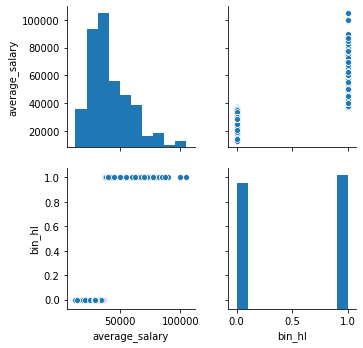

In [204]:
sns.pairplot(df);
# obviously tells us nothing because only two of the variables are float/int values, so I will try to use groupby

In [209]:
df.title.value_counts()

medium    376
senior     87
junior     32
Name: title, dtype: int64

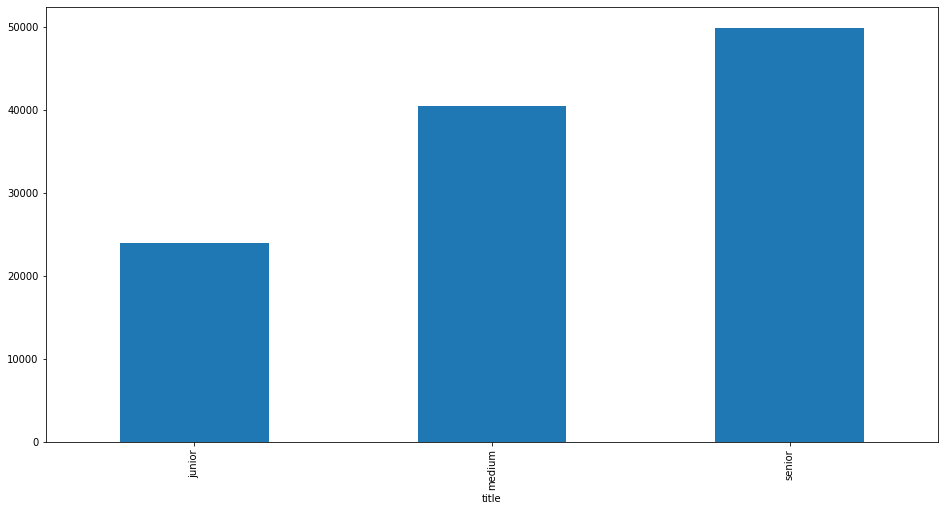

In [210]:
df.groupby('title').mean().average_salary.plot(kind='bar', figsize=(16,8));
# good to see here that the data makes sense - senior earning the most on average, junior earning the least

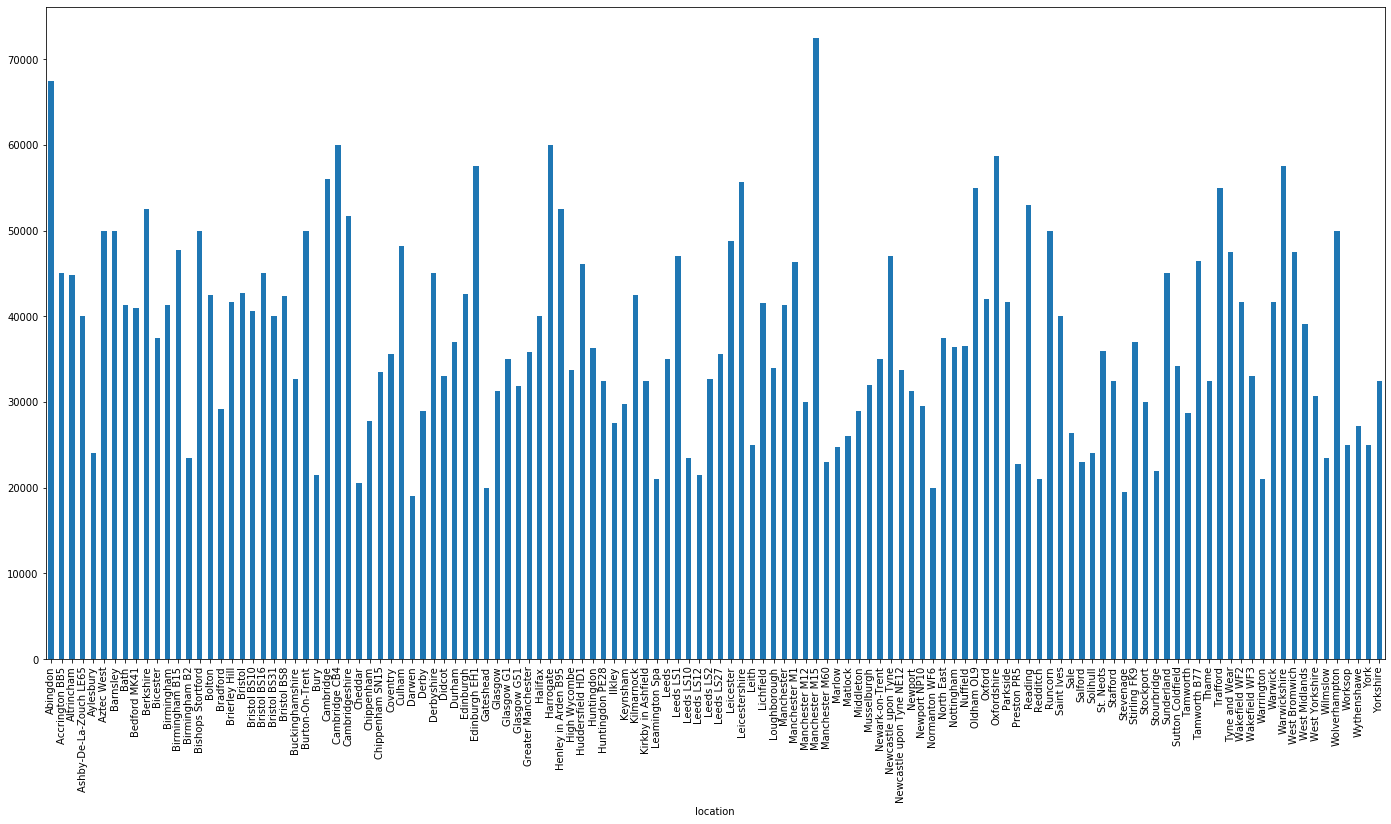

In [213]:
df.groupby('location').mean().average_salary.plot(kind='bar', figsize=(24,12));
# hard to conclude much from this, since the locations have many different names

In [215]:
#df.groupby('company').mean().average_salary.plot(kind='bar', figsize=(24,12));
# Far too many companies for this to be of any use

In [79]:
X = df[['location','title']]
y = df.high_low

In [80]:
X = pd.get_dummies(X, drop_first=True)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [82]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [83]:
model = LogisticRegressionCV(Cs=10,solver='lbfgs',max_iter=10000, cv=5)
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=10000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [84]:
#print(cross_val_score(model, X_train, y_train, cv=5).mean())

In [85]:
model.score(X_test, y_test)

0.6060606060606061

In [86]:
df.head()

,company,job,location,salary,description,salary_per_year,average_salary,high_low,title
1,NHS Scotland,Junior Technician - Student Placement,Glasgow,"£19,945 - £21,947 a year",Current technologies include Oracle Exadata da...,"£19,945 - £21,947 a year",20946.0,low,junior
3,Hydrogen Group,Technical Data Business Analyst – Glasgow – Pe...,Glasgow,"£30,000 - £44,000 a year",Technical Data Business Analyst – Glasgow – Pe...,"£30,000 - £44,000 a year",37000.0,low,medium
50,Sparta Global,Junior Data Analyst,Birmingham B2,"£21,000 - £25,999 a year",Gather data from primary and secondary data so...,"£21,000 - £25,999 a year",23499.5,low,junior
51,Sparta Global,Junior Data Engineer,Birmingham B2,"£21,000 - £25,999 a year",Gather data from primary and secondary data so...,"£21,000 - £25,999 a year",23499.5,low,junior
52,Mitchell Adam,Data Analyst,Birmingham,"£25,000 - £30,000 a year",This position would be applicable for a number...,"£25,000 - £30,000 a year",27500.0,low,medium


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words='english')

In [88]:
tvec.fit(df['description'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [89]:
X_desc = tvec.transform(df['description'])

In [90]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_desc,y)

cross_val_score(model,X,y,cv=5).mean()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.5919191919191918

In [91]:
X = df[['location','title']]
y = df.high_low

In [92]:
X_dum = pd.get_dummies(X, drop_first=True)

In [93]:
import scipy
sparse_matrix = scipy.sparse.csr_matrix(X_dum.values)


In [94]:
sparse1 = scipy.sparse.hstack([sparse_matrix, X_desc])
# Adding the nlp stuff from X_desc to the other variables location and title

In [132]:
bin_hl = []
for i in df.high_low:
    if i == 'high':
        bin_hl.append(1)
    else:
        bin_hl.append(0)

In [134]:
df['bin_hl']=bin_hl

In [135]:
X = sparse1
y = df.bin_hl

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [137]:
model = LogisticRegression(max_iter = 10000)
model.fit(X_train,y_train)

cross_val_score(model,X,y,cv=5).mean()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6444444444444445

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [139]:
# fill the dictionary of parameters
gs_params = {'n_estimators': [10, 50, 100],
             'max_features': ['auto','sqrt','log2'],
             'max_depth': [1,2,3]}

# create your gridsearch object
model = RandomForestClassifier()
rf_gridsearch = GridSearchCV(model,
                             gs_params,
                             n_jobs=2, 
                             cv=5, 
                             verbose=1)

In [140]:
rf_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 113 tasks      | elapsed:    6.1s
[Parallel(n_jobs=2)]: Done 135 out of 135 | elapsed:    7.1s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [141]:
rf_gridsearch.best_params_

{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}

In [142]:
rf_gridsearch.best_score_
# gridsearch on randomforest gave a score of 0.63

0.6540404040404041

In [143]:
# next I will try a gridsearch on a regular logistic regression, as it seems to be giving the best scores

In [144]:
# fill the dictionary of parameters
gs_params = {'max_iter': [100, 1000, 10000],
             'penalty': ['l2','l1'],
             'C':[0.001,.009,0.01,.09,1,5,10,25]}

# create your gridsearch object
model = LogisticRegression()
lr_gridsearch = GridSearchCV(model,
                             gs_params,
                             n_jobs=2, 
                             cv=5, 
                             verbose=1)

In [145]:
lr_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed:  2.4min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [146]:
lr_gridsearch.best_params_

{'C': 25, 'max_iter': 100, 'penalty': 'l2'}

In [147]:
lr_gridsearch.best_score_

0.7297979797979798

In [148]:
# this is my best score so far

### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

In [149]:
y_pred = lr_gridsearch.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
# print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
# print('Precision Score : ' + str(precision_score(y_test,y_pred)))
# print('Recall Score : ' + str(recall_score(y_test,y_pred)))
# print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Confusion Matrix : 
[[35 13]
 [ 7 44]]


In [151]:
TP = 35
FP = 13
TN = 44
FN = 7

In [152]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))

Accuracy Score : 0.797979797979798


In [153]:
precision = TP/(TP+FP)
precision

0.7291666666666666

In [154]:
recall = TP/(TP+FN)
recall

0.8333333333333334

In [155]:
# The client would rather have more false negatives than false positives
# Therefore, maximise precision

In [158]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25], 'max_iter':[1000]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'precision', cv=5)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [170]:
def predictions_confusion(model, X, y):

    yhat = model.predict(X)
    yhat_pp = model.predict_proba(X)

    conmat = np.array(confusion_matrix(y, yhat))

    confusion = pd.DataFrame(conmat, index=['is_high', 'is_low'],
                             columns=['predicted_high', 'predicted_low'])
    return yhat, yhat_pp, confusion

In [171]:
yhat, yhat_pp, confusion = predictions_confusion(lr_gridsearch, X_test, y_test)
confusion

,predicted_high,predicted_low
is_high,35,13
is_low,7,44


In [172]:
pp = pd.DataFrame(yhat_pp, columns=['low', 'high'])
pp.head()

,low,high
0,0.441839,0.558161
1,0.958529,0.041471
2,0.615967,0.384033
3,0.993411,0.006589
4,0.727347,0.272653


In [174]:
# we now want to minimise the number of false positives:

In [173]:
false_positives = []
for thresh in np.arange(1, 100)/100.:
    labeled_high = np.array([1 if x >= thresh else 0 for x in pp.high.values])
    fp = np.mean((y_test == 0) & (labeled_high == 1))
    false_positives.append((thresh, fp))
    print('Threshold:', thresh, 'false positives:', fp)

Threshold: 0.01 false positives: 0.46464646464646464
Threshold: 0.02 false positives: 0.43434343434343436
Threshold: 0.03 false positives: 0.41414141414141414
Threshold: 0.04 false positives: 0.40404040404040403
Threshold: 0.05 false positives: 0.3939393939393939
Threshold: 0.06 false positives: 0.3838383838383838
Threshold: 0.07 false positives: 0.3838383838383838
Threshold: 0.08 false positives: 0.36363636363636365
Threshold: 0.09 false positives: 0.35353535353535354
Threshold: 0.1 false positives: 0.3434343434343434
Threshold: 0.11 false positives: 0.3333333333333333
Threshold: 0.12 false positives: 0.3333333333333333
Threshold: 0.13 false positives: 0.32323232323232326
Threshold: 0.14 false positives: 0.31313131313131315
Threshold: 0.15 false positives: 0.31313131313131315
Threshold: 0.16 false positives: 0.31313131313131315
Threshold: 0.17 false positives: 0.31313131313131315
Threshold: 0.18 false positives: 0.30303030303030304
Threshold: 0.19 false positives: 0.2828282828282828
T

In [ ]:
# changing the thresholf as shown above can reduce the rate of false positives to 0
# however, this will also massively increases the number of false negatives
# a good balance needs to be found.

In [175]:
accuracies = []
for thresh in np.arange(1, 100)/100.:
    labeled_high = np.array([1 if x >= thresh else 0 for x in pp.high.values])
    acc = np.mean(y_test==labeled_high)
    accuracies.append((thresh, acc))
    print('Threshold:', thresh, 'Correct predictions:', acc)

Threshold: 0.01 Correct predictions: 0.5353535353535354
Threshold: 0.02 Correct predictions: 0.5656565656565656
Threshold: 0.03 Correct predictions: 0.5858585858585859
Threshold: 0.04 Correct predictions: 0.5959595959595959
Threshold: 0.05 Correct predictions: 0.5959595959595959
Threshold: 0.06 Correct predictions: 0.6060606060606061
Threshold: 0.07 Correct predictions: 0.6060606060606061
Threshold: 0.08 Correct predictions: 0.6262626262626263
Threshold: 0.09 Correct predictions: 0.6363636363636364
Threshold: 0.1 Correct predictions: 0.6464646464646465
Threshold: 0.11 Correct predictions: 0.6565656565656566
Threshold: 0.12 Correct predictions: 0.6565656565656566
Threshold: 0.13 Correct predictions: 0.6666666666666666
Threshold: 0.14 Correct predictions: 0.6767676767676768
Threshold: 0.15 Correct predictions: 0.6767676767676768
Threshold: 0.16 Correct predictions: 0.6767676767676768
Threshold: 0.17 Correct predictions: 0.6666666666666666
Threshold: 0.18 Correct predictions: 0.6767676767

In [177]:
import matplotlib.pyplot as plt

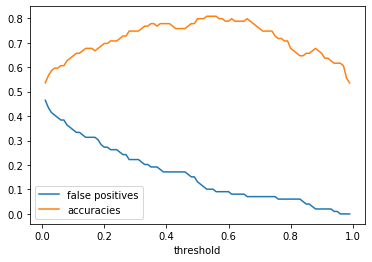

In [178]:
false_positives = np.array(false_positives)
accuracies = np.array(accuracies)
plt.plot(false_positives[:, 0], false_positives[:, 1], label='false positives')
plt.plot(accuracies[:, 0], accuracies[:, 1], label='accuracies')
plt.legend()
plt.xlabel('threshold')
plt.show()

In [179]:
# this shows that a threshold of around 0.6 would maximise accuracy, as well as keeping false positives low

In [186]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [181]:
fpr, tpr, threshold = roc_curve(y_test, yhat_pp[:, 1])
roc_auc = auc(fpr, tpr)

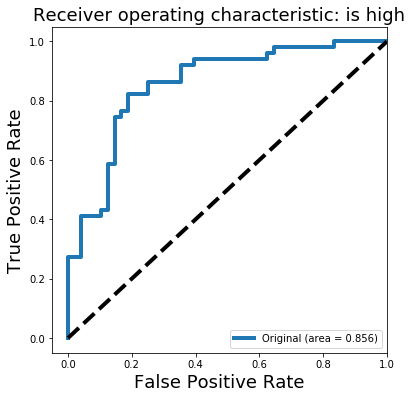

In [183]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(fpr, tpr, label='Original (area = %0.3f)' % roc_auc, linewidth=4)
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)

ax.set_xlim([-0.05, 1.0])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate', fontsize=18)
ax.set_title('Receiver operating characteristic: is high', fontsize=18)
ax.legend(loc="lower right")

plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

In [ ]:
# I have discussed some of the differences of high-recall vs high-precision.
# To summarise, high precision will minimise the number of false positives
# high recall will minimise the number of false negatives
# In this case, the client would rather someone be told they will incorrectly
# get a lower salary (FN) than a higher salary (FP)
# Therefore, a high precision model would be preferred

In [184]:
# The ROC curve is above

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

In [ ]:
## YOUR TEXT HERE IN MARKDOWN FORMAT 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [ ]:
## YOUR LINK HERE IN MARKDOWN FORMAT 